In [1]:
from readability import Readability
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import nltk

In [6]:
efcamdat_file_path = './../data/Final database (main prompts).xlsx'
df = pd.read_excel(efcamdat_file_path, sheet_name='Sheet 1')
efcamdat_df = df[['writing_id', 'cefr', 'cefr_numeric', 'level', 'grade', 'wordcount', 'mtld', 'text', 'text_corrected']]

In [ ]:
for index, row in efcamdat_df.iterrows():
    text = row['text']
    rd = Readability(text)
    efcamdat_df.at[index, 'flesch_reading_ease'] = rd.FleschReadingEase()
    efcamdat_df.at[index, 'flesch_kincaid_grade'] = rd.FleschKincaidGradeLevel()
    efcamdat_df.at[index, 'gunning_fog_index'] = rd.GunningFogIndex()
    efcamdat_df.at[index, 'coleman_liau_index'] = rd.ColemanLiauIndex()
    efcamdat_df.at[index, 'smog_index'] = rd.SMOGIndex()
    efcamdat_df.at[index, 'ARI'] = rd.ARI()
    efcamdat_df.at[index, 'lix'] = rd.LIX()
    efcamdat_df.at[index, 'rix'] = rd.RIX()

In [2]:
efcamdat_processed_file_path = './../data/final_database_main_prompt_readability.csv'
efcamdat_df = pd.read_csv(efcamdat_processed_file_path)

In [4]:
efcamdat_df[efcamdat_df['cefr_numeric']==5].iloc[0]['text_corrected']

"bello everybody! Tomorrow will be a historical day and you can be part of it! I ask you to go to the pulls and vote for me in order that we can start into a better future together. With my experience and wisdom and my intellectual and social competence I am the born leader! You won't never feel alone or misunderstood. You can count on me! I will introduce a new paying system in the lunchroom to reduce queuing. In addition I will hire knew cooks who will make delicious food with regional and healthy ingredients. I will convince the Education Minister to build a new garden where we can cultivate fruits and vegetables. On the roof of our school building a new 20 Kip solar panel system will be installed. These are only few projects which will be realized as soon as I am the following student council president. So let's do it and don't forget to vote for me tomorrow!"

In [24]:
def avg_sentence_length(text):
    sentences = nltk.sent_tokenize(text)
    return sum(len(nltk.word_tokenize(sentence)) for sentence in sentences) / len(sentences)

selected_rows = efcamdat_df[efcamdat_df['cefr_numeric']==5]
selected_rows['avg_sentence_length'] = selected_rows['text_corrected'].apply(avg_sentence_length)
selected_rows['avg_sentence_length'].mean()

/tmp/ipykernel_4370/1232079543.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_rows['avg_sentence_length'] = selected_rows['text_corrected'].apply(avg_sentence_length)


19.533176318928806

In [31]:
selected_rows = efcamdat_df[efcamdat_df['cefr_numeric'] == 5]

# Concatenate all text in the selected rows
all_text = ' '.join(selected_rows['text_corrected'])

# Tokenize the text into words
words = nltk.word_tokenize(all_text)

# Calculate the total word length
word_lengths = np.array([len(word) for word in words])

# Calculate the total word length and average word length
total_word_length = np.sum(word_lengths)

# Calculate the average word length
average_word_length = total_word_length / len(words)
average_word_length

4.084227325208467

In [29]:
txt = "bello everybody! Tomorrow will be a historical day and you can be part of it! I ask you to go to the pulls and vote for me in order that we can start into a better future together. With my experience and wisdom and my intellectual and social competence I am the born leader! You won't never feel alone or misunderstood. You can count on me! I will introduce a new paying system in the lunchroom to reduce queuing. In addition I will hire knew cooks who will make delicious food with regional and healthy ingredients. I will convince the Education Minister to build a new garden where we can cultivate fruits and vegetables. On the roof of our school building a new 20 Kip solar panel system will be installed. These are only few projects which will be realized as soon as I am the following student council president. So let's do it and don't forget to vote for me tomorrow!"

words = nltk.word_tokenize(txt)
word_lengths = np.array([len(word) for word in words])
total_word_length = np.sum(word_lengths)
average_word_length = total_word_length / len(words)
average_word_length

4.028248587570621

In [22]:
efcamdat_df['flesch_reading_ease'].std()/ efcamdat_df['flesch_reading_ease'].mean()

0.2522401083696058

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


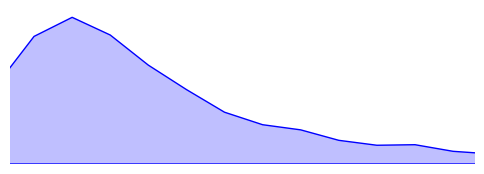

In [29]:
# Assuming 'series' is your Pandas Series
sns.set(style="whitegrid")

# Create a figure and axis
plt.figure(figsize=(6, 2))

# Plot the kernel density estimate (KDE)
sns.kdeplot(efcamdat_df['rix'], color='blue', fill=True)

# Calculate quartiles
q1 = efcamdat_df['rix'].quantile(0.1)
q3 = efcamdat_df['rix'].quantile(0.9)

# Add vertical lines for quartiles
# plt.axvline(q1, color='red', linestyle='dashed', linewidth=1)
# plt.axvline(q3, color='green', linestyle='dashed', linewidth=1)
plt.xlim(q1, q3)

# Remove x and y axis labels
plt.xticks([])
plt.yticks([])

# Remove x and y axis ticks
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# Remove background grid lines
plt.grid(False)

# Set labels and title
plt.xlabel('')
plt.ylabel('')
# plt.title('Kernel Density Plot with Quartiles')

# Add legend
plt.legend().set_visible(False)

# Show the plot
# plt.show()
plt.savefig('./../result/rix_distribution.pdf', dpi=300, bbox_inches='tight')

In [31]:
aa= efcamdat_df.groupby('cefr_numeric', as_index=False)[['flesch_reading_ease', 'flesch_kincaid_grade', 'gunning_fog_index', 'coleman_liau_index', 'smog_index', 'ARI', 'lix', 'rix']].mean()

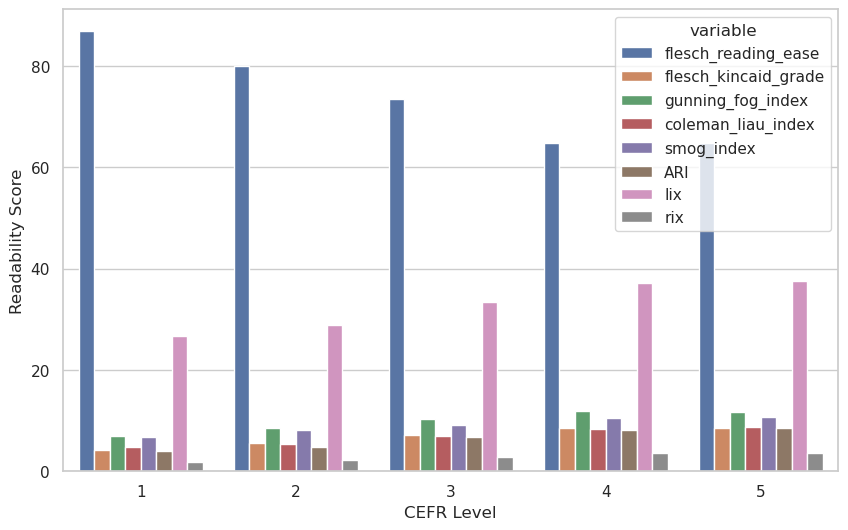

In [34]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.barplot(x="cefr_numeric", y="value", hue="variable", data=pd.melt(aa, ['cefr_numeric']))
ax.set(xlabel='CEFR Level', ylabel='Readability Score')
plt.show()


In [20]:
efcamdat_df[['flesch_reading_ease', 'flesch_kincaid_grade', 'gunning_fog_index', 'coleman_liau_index', 'smog_index', 'ARI', 'lix', 'rix']].describe()

,flesch_reading_ease,flesch_kincaid_grade,gunning_fog_index,coleman_liau_index,smog_index,ARI,lix,rix
count,406062.000000,406062.000000,406062.000000,406062.000000,406062.000000,406062.000000,406062.000000,406062.000000
mean,81.394526,5.281454,8.316288,5.489563,7.807533,4.927208,29.008181,2.243063
std,20.530964,5.167646,5.288650,3.727113,2.986923,6.609371,14.628704,2.663712
min,-1206.210000,-8.302700,0.725000,-29.743600,3.000000,-6.881855,2.416667,0.000000
25%,72.298900,2.285200,5.081500,3.235700,6.038218,1.065616,20.138889,0.888889
50%,84.095700,4.084000,7.002900,5.139000,7.472136,3.133548,25.809524,1.500000
75%,93.985300,6.780000,10.000000,7.347500,9.210590,6.480000,33.727273,2.500000
max,164.303100,182.246700,97.248500,331.526700,38.916570,265.810000,250.913420,64.000000


In [35]:
efcamdat_df[['cefr_numeric', 'flesch_reading_ease', 'flesch_kincaid_grade', 'gunning_fog_index', 'coleman_liau_index', 'smog_index', 'ARI', 'lix', 'rix']].corr(method='pearson')

,cefr_numeric,flesch_reading_ease,flesch_kincaid_grade,gunning_fog_index,coleman_liau_index,smog_index,ARI,lix,rix
cefr_numeric,1.000000,-0.306809,0.255606,0.272901,0.277446,0.379417,0.188288,0.206838,0.173731
flesch_reading_ease,-0.306809,1.000000,-0.903843,-0.788764,-0.788124,-0.801554,-0.805428,-0.820256,-0.774083
flesch_kincaid_grade,0.255606,-0.903843,1.000000,0.949839,0.683778,0.803012,0.961737,0.937319,0.883735
gunning_fog_index,0.272901,-0.788764,0.949839,1.000000,0.594183,0.859083,0.936392,0.922134,0.858255
coleman_liau_index,0.277446,-0.788124,0.683778,0.594183,1.000000,0.631187,0.717383,0.718886,0.647102
smog_index,0.379417,-0.801554,0.803012,0.859083,0.631187,1.000000,0.729909,0.772347,0.747429
ARI,0.188288,-0.805428,0.961737,0.936392,0.717383,0.729909,1.000000,0.952371,0.893990
lix,0.206838,-0.820256,0.937319,0.922134,0.718886,0.772347,0.952371,1.000000,0.927512
rix,0.173731,-0.774083,0.883735,0.858255,0.647102,0.747429,0.893990,0.927512,1.000000


[ True False False False False False False False]


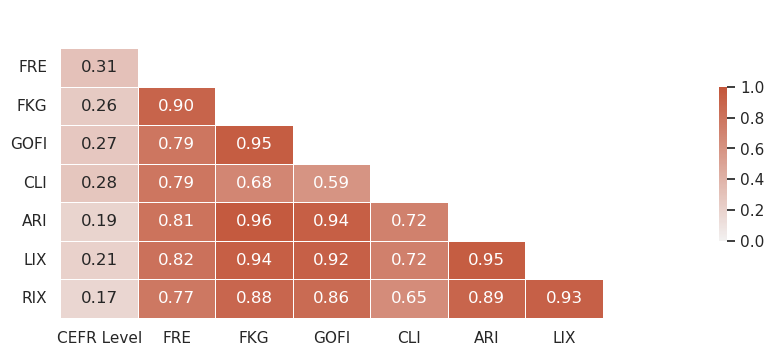

In [10]:
corr = efcamdat_df[['cefr_numeric', 'flesch_reading_ease', 'flesch_kincaid_grade', 'gunning_fog_index', 'coleman_liau_index', 'ARI', 'lix', 'rix']].corr(method='pearson').abs()
# from mpltools import layout
import matplotlib
sns.set_theme(style="white")
mask = np.triu(np.ones_like(corr, dtype=bool))
mask_row = np.all(mask, axis=1)
mask_col = np.all(mask, axis=0)
print(mask_row)
# mask_label = np.all(np.is(corr), axis=1)
# print(mask)
w,h = matplotlib.figure.figaspect(0.25)
f, ax = plt.subplots(figsize=(10,4))
# set aspect ratio 16, 9
labels = ['CEFR Level', 'FRE', 'FKG', 'GOFI', 'CLI', 'ARI', 'LIX', 'RIX']
label_rows = [label if not mask else '' for label, mask in zip(labels, mask_row)]
label_cols = [label if not mask else '' for label, mask in zip(labels, mask_col)]
# ax.set_aspect(0.5)
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=0, center=0, square=False, fmt=".2f", linewidths=.5, cbar_kws={"shrink": .5}, annot=True, xticklabels=label_cols, yticklabels=label_rows)
ax.set_yticklabels(ax.get_yticklabels(), rotation='horizontal')
# plt.title('Correlation between Readability Scores and CEFR')  annot_kws={"size": 8}
# plt.show()
# export image as pdf
plt.savefig('./../result/correlation_between_readability_scores_and_cefr.pdf', dpi=300, bbox_inches='tight')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

corr = efcamdat_df.groupby('cefr_numeric')[['cefr_numeric', 'flesch_reading_ease', 'flesch_kincaid_grade', 'gunning_fog_index', 'coleman_liau_index', 'smog_index', 'ARI', 'lix', 'rix']].corr(method='pearson')

sns.set_theme(style="white")
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()


In [32]:
# Dataset split into train and test in 80:20 ratio for each cefr_numeric level
from sklearn.model_selection import train_test_split

train_df = pd.DataFrame()
test_df = pd.DataFrame()

for cefr_numeric in range(1, 6):
    cefr_numeric_df = efcamdat_df[efcamdat_df['cefr_numeric'] == cefr_numeric]
    train, test = train_test_split(cefr_numeric_df, test_size=0.2, random_state=42)
    train_df = pd.concat([train_df, train])
    test_df = pd.concat([test_df, test])

print(train_df.shape)
print(test_df.shape)
train_df.to_csv('./../data/train_efcamdat.csv', index=False)
test_df.to_csv('./../data/test_efcamdat.csv', index=False)



(324847, 17)
(81215, 17)
